# TESLA STOCK FORECAST

Univariate Analysis on Tesla Stock to Forecast Stock Pricing using LSTM(Long Short-Term Memory) an artificial recurrent Neural Netwrok Architecture

IMPORTING Required Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import math

In [2]:
import pandas_datareader as web
import time
import os


In [3]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [4]:
df = pd.read_csv(r'C:/Users/PC/Desktop/TESLA/TSLA.csv', index_col="Date", parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2010-06-29 to 2020-02-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2416 non-null   float64
 1   High       2416 non-null   float64
 2   Low        2416 non-null   float64
 3   Close      2416 non-null   float64
 4   Adj Close  2416 non-null   float64
 5   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.1 KB


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


## Data Cleaning
Checking NULL Values in the Data

In [7]:
df.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

False indicates that we do not have any NULL values in the Data. 

In [8]:
df.shape

(2416, 6)

In [9]:
len(df)

2416

### Stock Trend Visualization


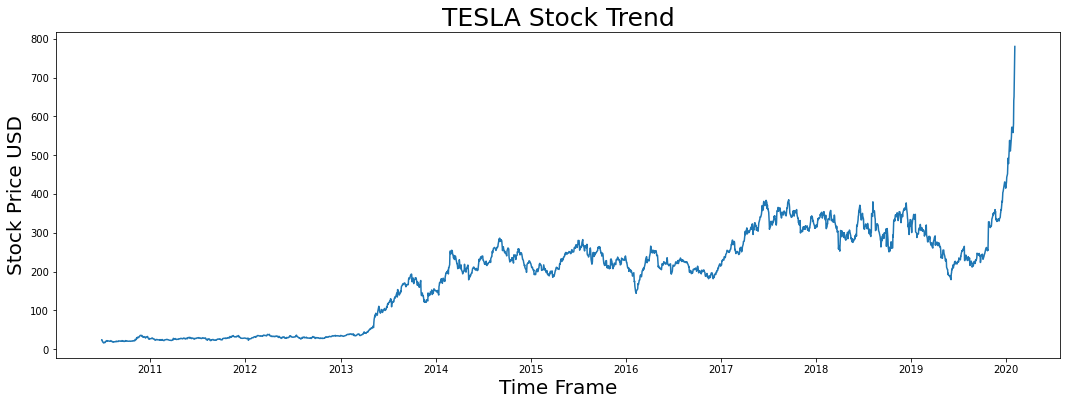

In [10]:
plt.figure(figsize=(18,6))
plt.title('TESLA Stock Trend', fontsize=25)
plt.plot(df['Close'])
plt.xlabel('Time Frame', fontsize=20)
plt.ylabel('Stock Price USD', fontsize=20)
plt.show()

Based on the visualisation computed above we have an understanding that the TESLA stocks were stagnantly from 2010 to 2013 and started to increase between 2013-2014. The stock price then increased exponentialy between 2019 and 2020.

# Data Split into Training and Test sets

Only considering the field 'Close' and 'Date' from the Dataset and use 80% of the data for training and 20% of the data for testing

In [11]:
Fdf = df.filter(['Close'])

In [12]:
Fdf.head()

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


In [13]:
#convert data into numpy array
Dataset = Fdf.values

In [14]:
len(Dataset)

2416

In [15]:
training_length = math.ceil(len(Dataset)* .8)

In [16]:
Dataset.shape

(2416, 1)

In [17]:
training_length

1933

Scaling Data

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_scaler = scaler.fit_transform(Dataset)

In [20]:
data_scaler

array([[0.01058623],
       [0.01050772],
       [0.00806072],
       ...,
       [0.81786181],
       [0.83063335],
       [1.        ]])

Scaled Training dataset

In [21]:
train_data = data_scaler[0:training_length, :]
x_train =[]
y_train =[]

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i,0])
    y_train.append(train_data[i,0])
    if i<=21:
        print(x_train)
        print(y_train)
        print()

[array([0.01058623, 0.01050772, 0.00806072, 0.0044491 , 0.00040565,
       0.        , 0.0021722 , 0.00209369, 0.0016357 , 0.00306202,
       0.00528657, 0.005352  , 0.00633342, 0.00799529, 0.00588851,
       0.00578382, 0.0068045 , 0.00718398, 0.00673907, 0.00621565])]
[0.006438103899502751]

[array([0.01058623, 0.01050772, 0.00806072, 0.0044491 , 0.00040565,
       0.        , 0.0021722 , 0.00209369, 0.0016357 , 0.00306202,
       0.00528657, 0.005352  , 0.00633342, 0.00799529, 0.00588851,
       0.00578382, 0.0068045 , 0.00718398, 0.00673907, 0.00621565]), array([0.01050772, 0.00806072, 0.0044491 , 0.00040565, 0.        ,
       0.0021722 , 0.00209369, 0.0016357 , 0.00306202, 0.00528657,
       0.005352  , 0.00633342, 0.00799529, 0.00588851, 0.00578382,
       0.0068045 , 0.00718398, 0.00673907, 0.00621565, 0.0064381 ])]
[0.006438103899502751, 0.005953938759487045]



In [22]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train) 


x_train.shape

(1913, 20)

In [23]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(1913, 20, 1)

In [24]:
#Create the testing data set
#Create a new array containin scaled values from index 1873 to 2416
test_data = data_scaler[training_length - 20:, :]

#Create x_test and y_test

x_test =[]
y_test =Dataset[training_length:,:]

for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i,0])


#convert the data to a numpy array
x_test = np.array(x_test)

#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
T_shape=Dataset.shape
train_shape = train_data.shape
test_shape = test_data.shape
def isLeak(T_shape, train_shape, test_shape):
    return(T_shape[0]==(train_shape[0] +test_shape[0]))

print(isLeak(Dataset.shape,train_shape, test_shape))

False


Checking Data Leaks betweek Training and Testing Dataset

In [25]:
T_shape=Dataset.shape
train_shape = train_data.shape
test_shape = test_data.shape
def isLeak(T_shape, train_shape, test_shape):
    return(T_shape[0]==(train_shape[0] +test_shape[0]))

print(isLeak(Dataset.shape,train_shape, test_shape))

False


## LSTM Model
### Long Short-Term Memory 

In [26]:
model= Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
  

In [27]:
#Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1913/1913 [==============================] - 27s 12ms/step - loss: 0.0014


In [29]:
#Create the testing data set
#Create a new array containin scaled values from index 1873 to 2416
test_data = data_scaler[training_length - 20:, :]

#Create x_test and y_test

x_test =[]
y_test =Dataset[training_length:,:]

for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i,0])


#convert the data to a numpy array
x_test = np.array(x_test)

#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [30]:

#Get the models predicted price values
predictions =model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

## RMSE Score
RMSE (Root Mean Squared Error) is the standard deviation or errors which helps determining the accuracy of the model. Our model is giving us 0.77 RMSE score indicating our model is very efficient.

In [45]:
from sklearn.metrics import mean_squared_error
rmse =np.sqrt(np.mean(predictions- y_test)**2)
rmse

0.3250844602682601

In [44]:
np.round(rmse,2)

0.33

c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


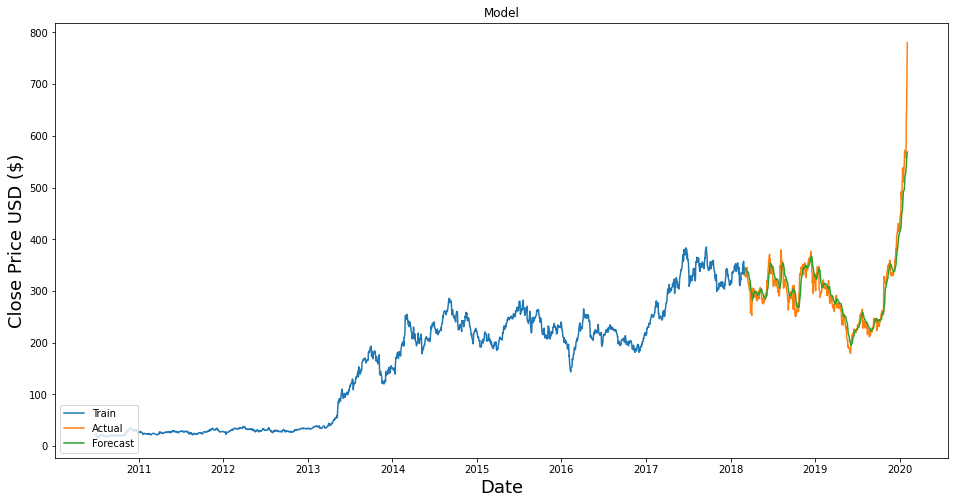

In [46]:

train = Fdf[:training_length]
valid = Fdf[training_length:]
valid['predictions'] = predictions

#Visualize the data

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train', 'Actual', 'Forecast'], loc='lower left')
plt.show()

In [34]:
#Show Valid and Predicted prices
valid

,Close,predictions
Date,,
2018-03-05,333.350006,344.414825
2018-03-06,328.200012,342.768677
2018-03-07,332.299988,340.649567
2018-03-08,329.100006,339.103302
2018-03-09,327.170013,337.581909
...,...,...
2020-01-28,566.900024,533.293701
2020-01-29,580.989990,537.508728
2020-01-30,640.809998,542.616577


In [51]:
dfnew = pd.read_csv(r'C:/Users/PC/Desktop/TESLA/TSLA.csv', index_col="Date", parse_dates=True)
new_df = dfnew.filter(['Close'])
last_20 = new_df[-20:].values
scaled_last_20 =scaler.transform(last_20)
X_test =[]
X_test.append(scaled_last_20)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print("Price predicted for 4th Feb 2020")
print(np.round(pred_price,2))


Price predicted for 4th Feb 2020
[[597.11]]


Conclusion:
The price predicted for the next closing date is 595.11 USD, the predicted price is very close to the actual stock value on 4th Feb, 2020. This value is based univariate analysis and for TESLA stockes other factors like trading volume and Elon Musk's social media activity.